# Logistic Regression

In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

### Iris Dataset

In [21]:
path_to_repo = '/Users/ruben/repo/personal/ga/DAT-23-NYC/'

In [22]:
column_headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
data = pd.read_csv(path_to_repo + 'data/iris/iris.csv', header=None, names=column_headers)
data.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


###Classifying setosas
Let's add a binary label: setosa or not setosa?

In [23]:
data["setosa"] = data.species == "setosa"

Let's try to predict if it's a setosa, based on just two features.

In [24]:
features = ['sepal_width', 'sepal_length']
X, y = data[features], data.setosa

In [25]:
model = LogisticRegression()
cross_val_score(model, X, y, cv=10).mean()

0.9933333333333334

###Predictions
That seems to work well. Let's try out some predictions.

In [26]:
model.fit(X, y)
print model.predict(X)[:5]  # this will give you True or False
print model.predict_proba(X)[:5]  # this will give you the probability

[ True  True  True  True  True]
[[ 0.10678679  0.89321321]
 [ 0.35021525  0.64978475]
 [ 0.12794251  0.87205749]
 [ 0.14581086  0.85418914]
 [ 0.05871329  0.94128671]]


Note that each prediction gives a probability for each class: not setosa, yes setosa. We want the latter.

In [27]:
y_pred = np.array(zip(*model.predict_proba(X))[1])
y_pred[:10]

array([ 0.89321321,  0.64978475,  0.87205749,  0.85418914,  0.94128671,
        0.95163009,  0.95124094,  0.87788572,  0.81229292,  0.73479813])

###Decision boundaries
Let's try to see if we could draw a decision boundary between the flowers. 

Note that for linear regression, the probability $P$ is given by

$$P = \frac{1}{1 + e^{-\big(\alpha + \beta_1 x_1 + \beta_2 x_2\big)}}$$

In classification, we usually round $P$ to 0 or 1, so with the cut-off at 1/2. 

But $P = 1/2$ if and only if

$$\alpha + \beta_1 x_1 + \beta_2 x_2 = 0$$

which we could rewrite as the linear line:

$$x_2 = -\frac{\alpha + \beta_1 x_1}{\beta_2}$$

Let's draw it!

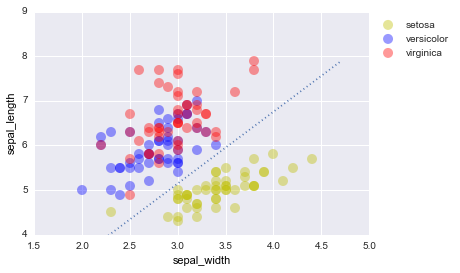

In [43]:
x1, x2 = features
colors = list("rby")

# Plot the flowers with color labels
for spec in data.species.unique():
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x1], data_spec[x2], label=spec, c=colors.pop(),
                linewidths=0, s=100, alpha=.4)
    
# draw the decision boundary
boundary_x1 = np.array([data[x1].min() - .3, data[x1].max() + .3])
boundary_x2 = -(model.intercept_ + model.coef_[0, 0] * boundary_x1) / model.coef_[0, 1]
f = plt.plot(boundary_x1, boundary_x2, ':')
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
f = plt.xlabel(x1), plt.ylabel(x2), plt.ylim(4, 9)

###More features, more labels
- Obviously, we could add more features to the $X$
- We could also add more classes to $y$

In [10]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X, y = data[features], data.species
model = LogisticRegression()
cross_val_score(model, X, y, cv=10).mean()

0.95333333333333337

In [11]:
model.fit(X, y)
print model.predict(X)[:5]  # this gives the predicted labels
print model.predict_proba(X)[:5]  # this gives the probabilties per label

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[[  8.79681649e-01   1.20307538e-01   1.08131372e-05]
 [  7.99706325e-01   2.00263292e-01   3.03825365e-05]
 [  8.53796795e-01   1.46177302e-01   2.59031285e-05]
 [  8.25383127e-01   1.74558937e-01   5.79356669e-05]
 [  8.97323628e-01   1.02665167e-01   1.12050036e-05]]


<hr>
## Exercises

- Make a classifier for virginicas using logistic regression (i.e., only predicting 1 for verginicas and 0 otherwise), **only** using petal's width and length
- Train and test of the model using cross validation
- What is a good baseline for accuracy (i.e., how would the naive classifier score)?
- What is the model's precision, recall, and F1 score, aside from its accuracy?
- (\*) What is the model's AUC (Area Under the ROC Curve)?
- (\*\*) Plot the flower's petal width and length and draw the decision boundary

In [18]:
data['virginica'] = data.species == 'virginica'
features = ['petal_length', 'petal_width']
X, y = data[features], data.virginica
model = LogisticRegression().fit(X, y)
print 1 - y.mean(), "baseline (always predicting False)"
print cross_val_score(model, X, y, cv=10).mean()
print cross_val_score(model, X, y, cv=10, scoring='precision').mean()
print cross_val_score(model, X, y, cv=10, scoring='recall').mean()
print cross_val_score(model, X, y, cv=10, scoring='f1').mean()
print cross_val_score(model, X, y, cv=10, scoring='roc_auc').mean()

0.666666666667 baseline (always predicting False)
0.946666666667
0.92619047619
0.94
0.921464646465
0.983


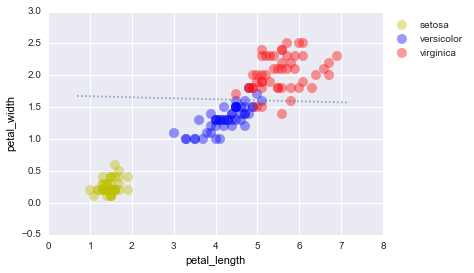

In [13]:
x1, x2 = features
colors = list("rby")

# Plot the flowers with color labels
for spec in data.species.unique():
    data_spec = data[data.species == spec]
    plt.scatter(data_spec[x1], data_spec[x2], label=spec, c=colors.pop(),
                linewidths=0, s=100, alpha=.4)
    
# draw the decision boundary
boundary_x1 = np.array([data[x1].min() - .3, data[x1].max() + .3])
boundary_x2 = -(model.intercept_ + model.coef_[0, 0] * boundary_x1) / model.coef_[0, 1]
f = plt.plot(boundary_x1, boundary_x2, ':')
    
f = plt.legend(loc="upper left", bbox_to_anchor=(1,1))
f = plt.xlabel(x1), plt.ylabel(x2)